# CSE4088 Machine Learning

## Göksel Tokur - 150116049

## Merve Ayer - 150119828

In [129]:
import pandas as pd
import os
import time
from datetime import timedelta, datetime
from dateutil import parser
import math
from tqdm import tqdm_notebook
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## Read Collected Data from CSV

In [130]:
df = pd.read_csv('data/BTCUSDT-1m-1Jun2020to1Dec2020data.csv')
df.head()

df.tail(10)

,Timestamp,Open,High,Low,Close,Volume,Close_time,Quote_av,Trades,Tb_base_av,Tb_quote_av,Ignore
263242,2020-11-30 23:52:00,19744.00,19744.99,19740.22,19744.48,60.573448,1606780379999,1.195970e+06,986,41.370690,8.168287e+05,0
263243,2020-11-30 23:53:00,19744.49,19744.99,19699.52,19718.28,119.123054,1606780439999,2.349155e+06,1683,68.558198,1.351917e+06,0
263244,2020-11-30 23:54:00,19718.28,19736.03,19625.05,19641.37,97.284917,1606780499999,1.915027e+06,2217,37.528715,7.392528e+05,0
263245,2020-11-30 23:55:00,19641.37,19697.58,19637.04,19663.31,112.950287,1606780559999,2.221748e+06,2162,65.823884,1.294934e+06,0
263246,2020-11-30 23:56:00,19663.25,19672.28,19635.00,19656.01,80.342827,1606780619999,1.579052e+06,1776,34.951323,6.869545e+05,0
263247,2020-11-30 23:57:00,19656.01,19686.37,19650.00,19655.99,58.163503,1606780679999,1.143874e+06,1151,29.788851,5.858160e+05,0
263248,2020-11-30 23:58:00,19656.10,19679.00,19647.83,19658.33,84.698943,1606780739999,1.665254e+06,1482,31.676067,6.227900e+05,0
263249,2020-11-30 23:59:00,19658.33,19700.00,19656.82,19695.87,136.845571,1606780799999,2.693831e+06,1708,95.473753,1.879199e+06,0
263250,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435,1606780859999,2.681137e+06,1828,72.113618,1.420672e+06,0
263251,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435,1606780859999,2.681137e+06,1828,72.113618,1.420672e+06,0


In [131]:
# Check is there a missing value
print('Is there a missing value? - ',df.isnull().values.any())

Is there a missing value? -  False


In [132]:
# Drop columns that we won't use
df = df.drop('Close_time', 1)
df = df.drop('Quote_av', 1)
df = df.drop('Trades', 1)
df = df.drop('Tb_base_av', 1)
df = df.drop('Tb_quote_av', 1)
df = df.drop('Ignore', 1)

df.tail(10)

,Timestamp,Open,High,Low,Close,Volume
263242,2020-11-30 23:52:00,19744.00,19744.99,19740.22,19744.48,60.573448
263243,2020-11-30 23:53:00,19744.49,19744.99,19699.52,19718.28,119.123054
263244,2020-11-30 23:54:00,19718.28,19736.03,19625.05,19641.37,97.284917
263245,2020-11-30 23:55:00,19641.37,19697.58,19637.04,19663.31,112.950287
263246,2020-11-30 23:56:00,19663.25,19672.28,19635.00,19656.01,80.342827
263247,2020-11-30 23:57:00,19656.01,19686.37,19650.00,19655.99,58.163503
263248,2020-11-30 23:58:00,19656.10,19679.00,19647.83,19658.33,84.698943
263249,2020-11-30 23:59:00,19658.33,19700.00,19656.82,19695.87,136.845571
263250,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435
263251,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435


In [133]:
'''
from sklearn.preprocessing import MinMaxScaler


#Columns of price data to use
columns = ['Close', 'Open', 'High', 'Low', 'Volume']

scaler = MinMaxScaler()
# normalization
for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
    
df.tail(10)
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\n\n\n#Columns of price data to use\ncolumns = ['Close', 'Open', 'High', 'Low', 'Volume']\n\nscaler = MinMaxScaler()\n# normalization\nfor c in columns:\n    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))\n    \ndf.tail(10)\n"

# Sampling

In [134]:
# Produce training samples to predict future from past.
def sampler(P, F, A, sliding_window=True):
    number_of_samples = P + F
    
    if sliding_window:
        I = np.arange(number_of_samples) + np.arange(A.shape[0] - number_of_samples + 1).reshape(-1, 1)
    else:
        if A.shape[0] % number_of_samples == 0:
            I = np.arange(number_of_samples) + np.arange(0, A.shape[0], number_of_samples).reshape(-1, 1)
        else:
            I = np.arange(number_of_samples) + np.arange(0, A.shape[0] - number_of_samples, number_of_samples).reshape(-1, 1)
            
    B = A[I].reshape(-1, number_of_samples * A.shape[1], A.shape[2])
    number_of_features = P * A.shape[1]
    sample_matrix = B[:, :number_of_features]
    target_matrix = B[:, number_of_features:]
    
    return sample_matrix, target_matrix


data_file = 'data/BTCUSDT-1m-1Jun2020to1Dec2020data.csv'
df = pd.read_csv(data_file)

# Drop columns that we won't use
df = df.drop('Close_time', 1)
df = df.drop('Quote_av', 1)
df = df.drop('Trades', 1)
df = df.drop('Tb_base_av', 1)
df = df.drop('Tb_quote_av', 1)
df = df.drop('Ignore', 1)

df.tail(10)

,Timestamp,Open,High,Low,Close,Volume
263242,2020-11-30 23:52:00,19744.00,19744.99,19740.22,19744.48,60.573448
263243,2020-11-30 23:53:00,19744.49,19744.99,19699.52,19718.28,119.123054
263244,2020-11-30 23:54:00,19718.28,19736.03,19625.05,19641.37,97.284917
263245,2020-11-30 23:55:00,19641.37,19697.58,19637.04,19663.31,112.950287
263246,2020-11-30 23:56:00,19663.25,19672.28,19635.00,19656.01,80.342827
263247,2020-11-30 23:57:00,19656.01,19686.37,19650.00,19655.99,58.163503
263248,2020-11-30 23:58:00,19656.10,19679.00,19647.83,19658.33,84.698943
263249,2020-11-30 23:59:00,19658.33,19700.00,19656.82,19695.87,136.845571
263250,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435
263251,2020-12-01 00:00:00,19695.87,19720.00,19675.43,19715.93,136.104435


In [135]:
columns = ['Close']
o_df = df
time_stamps = df['Timestamp']
df = df.loc[:,columns]
real_df = o_df.loc[:,columns]

real_df

,Close
0,9439.58
1,9442.04
2,9443.08
3,9421.86
4,9432.64
...,...
263247,19655.99
263248,19658.33
263249,19695.87
263250,19715.93


### Normalize The Data with MinMax Normalization

In [136]:
# Normalize the data with min - max normalization
scaler = MinMaxScaler()

for c in columns:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
    
df

,Close
0,0.052724
1,0.052948
2,0.053043
3,0.051110
4,0.052092
...,...
263247,0.983166
263248,0.983379
263249,0.986798
263250,0.988625


In [137]:
file_name='BTCUSDT-1m-1Jun2020to1Dec2020data.h5'

# Features are backward sample dimensions
close_data = np.array(df)[:,None,:]
print('A', close_data)

real_close_data = np.array(real_df)[:,None,:]
print('real_A', real_close_data)

time_stamps = np.array(time_stamps)[:,None,None]
print('time_stamps', time_stamps)

number_of_backwards = 256
number_of_forwards = 16

# Pass preprocessed close data to the sampler
X, y = sampler(number_of_backwards, number_of_forwards, close_data, sliding_window=False)
print('Data', X)
print('Labels', y)

# Pass timestamps to the sampler
backward_times, forward_times = sampler(number_of_backwards, number_of_forwards, time_stamps, sliding_window=False)

# Pass real close data to the sampler
real_X, real_Y = sampler(number_of_backwards, number_of_forwards, real_close_data, sliding_window=False)

real_close_data = np.array(real_df)
real_backwards = np.array(real_X)
real_forwards = np.array(real_Y)


A [[[0.05272414]]

 [[0.05294818]]

 [[0.05304289]]

 ...

 [[0.98679802]]

 [[0.98862495]]

 [[0.98862495]]]
real_A [[[ 9439.58]]

 [[ 9442.04]]

 [[ 9443.08]]

 ...

 [[19695.87]]

 [[19715.93]]

 [[19715.93]]]
time_stamps [[['2020-06-01 00:00:00']]

 [['2020-06-01 00:01:00']]

 [['2020-06-01 00:02:00']]

 ...

 [['2020-11-30 23:59:00']]

 [['2020-12-01 00:00:00']]

 [['2020-12-01 00:00:00']]]
Data [[[0.05272414]
  [0.05294818]
  [0.05304289]
  ...
  [0.06523578]
  [0.06549261]
  [0.06669478]]

 [[0.06359373]
  [0.063489  ]
  [0.06332507]
  ...
  [0.06256187]
  [0.0623269 ]
  [0.06249812]]

 [[0.06268938]
  [0.0625983 ]
  [0.06231689]
  ...
  [0.06332507]
  [0.06257371]
  [0.06332689]]

 ...

 [[0.88523402]
  [0.88464295]
  [0.88527955]
  ...
  [0.88023409]
  [0.87946088]
  [0.87898275]]

 [[0.88589066]
  [0.88716022]
  [0.88868023]
  ...
  [0.98774245]
  [0.98518056]
  [0.98133818]]

 [[0.97337746]
  [0.97050774]
  [0.96718812]
  ...
  [0.94541797]
  [0.94181602]
  [0.94298085]]]
La

In [138]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Dense, Activation, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.callbacks import CSVLogger, ModelCheckpoint
import os
import tensorflow as tf


output_file_name = 'BTCUSDT-1m'

step_size = X.shape[1]
batch_size= 8
nb_features = X.shape[2]

epochs = 100

# Split training data and validation data %80 -> training
training_size = int(0.8* X.shape[0])
Xt = X[:training_size,:]
yt = y[:training_size,:]
Xv = X[training_size:,:]
yv = y[training_size:,:]


# Neural Network
# 2 layers
model = Sequential()

print((step_size, nb_features))
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=20))
model.add(Dropout(0.5))
model.add(Conv1D( strides=4, filters=nb_features, kernel_size=16))


'''
# 3 Layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=3, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=8))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=8))
# 4 layers
model.add(Conv1D(activation='relu', input_shape=(step_size, nb_features), strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D(activation='relu', strides=2, filters=8, kernel_size=2))
#model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(Conv1D( strides=2, filters=nb_features, kernel_size=2))
'''

model.compile(loss='mse', optimizer='adam')
model.fit(Xt, yt, verbose=1, batch_size=batch_size, validation_data=(Xv, yv), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True), ModelCheckpoint('models/'+'best_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')])


(256, 1)
Epoch 1/100
97/97 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0039

Epoch 00001: val_loss improved from inf to 0.00387, saving model to models/best_model.hdf5
Epoch 2/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0011

Epoch 00002: val_loss improved from 0.00387 to 0.00107, saving model to models/best_model.hdf5
Epoch 3/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0024

Epoch 00003: val_loss did not improve from 0.00107
Epoch 4/100
97/97 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0044

Epoch 00004: val_loss did not improve from 0.00107
Epoch 5/100
97/97 [==============================] - 0s 2ms/step - loss: 9.2965e-04 - val_loss: 0.0014

Epoch 00005: val_loss did not improve from 0.00107
Epoch 6/100
97/97 [==============================] - 0s 2ms/step - loss: 8.3997e-04 - val_loss: 1.9664e-04

Epoch 00006: val_loss improved from 0.00


Epoch 00051: val_loss did not improve from 0.00020
Epoch 52/100
97/97 [==============================] - 0s 2ms/step - loss: 5.0886e-04 - val_loss: 0.0024

Epoch 00052: val_loss did not improve from 0.00020
Epoch 53/100
97/97 [==============================] - 0s 2ms/step - loss: 5.8972e-04 - val_loss: 0.0010

Epoch 00053: val_loss did not improve from 0.00020
Epoch 54/100
97/97 [==============================] - 0s 2ms/step - loss: 5.1425e-04 - val_loss: 0.0011

Epoch 00054: val_loss did not improve from 0.00020
Epoch 55/100
97/97 [==============================] - 0s 2ms/step - loss: 4.9701e-04 - val_loss: 0.0019

Epoch 00055: val_loss did not improve from 0.00020
Epoch 56/100
97/97 [==============================] - 0s 2ms/step - loss: 5.8282e-04 - val_loss: 2.1290e-04

Epoch 00056: val_loss did not improve from 0.00020
Epoch 57/100
97/97 [==============================] - 0s 2ms/step - loss: 4.8469e-04 - val_loss: 2.5981e-04

Epoch 00057: val_loss did not improve from 0.00020
Epoc

# Load model

In [139]:
model.load_weights('models/best_model.hdf5')
model.compile(loss='mse', optimizer='adam')

# Change Variable Names

In [140]:
import matplotlib.pyplot as plt

# Split training data and validation data %80 -> training
training_size = int(X.shape[0] * 0.8)

close_data_val = X[training_size:,:,:]
print('close_data_val', close_data_val)
real_forwards_val = real_forwards[training_size:,:,:]
real_backwards_val = real_backwards[training_size:,:,:]
backward_times_val = backward_times[training_size:,:,:]
forward_times_val = forward_times[training_size:,:,:]



real_chart = np.append(real_backwards_val, real_forwards_val, axis=1)
print('real_chart', real_chart[0].shape,  (real_chart[0])[0].shape)
real_chart_times = np.append(backward_times_val, forward_times_val, axis=1)
print('real_chart_times', real_chart_times)


print('close_data_val' ,close_data_val[0].shape)
predicted = model.predict(close_data_val)
predicted_inverted = []
print('predicted', predicted)



# Inverse Transform (Min-Max Scaler)
for i in range(real_close_data.shape[1]):
    # 1D vector of the real data
    scaler.fit(real_close_data[:,i].reshape(-1,1))
    print('real_close_data[:,i]', real_close_data[:,i])
    predicted_inverted.append(scaler.inverse_transform(predicted[:,:,i]))
    print('predicted[:,:,i]', predicted[:,:,i])
    print('predicted_inverted', predicted_inverted)
    

# Get real_close values as 1D Vector
real_chart = real_chart[:,:,0].reshape(-1)
print('real_chart', real_chart)
real_chart_times = real_chart_times.reshape(-1)
print(real_chart_times)
real_chart_times = pd.to_datetime(real_chart_times, unit='ns')


# since we are appending in the first dimension
print(np.array(predicted_inverted)[0].shape)
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)
forward_times_val = pd.to_datetime(forward_times_val.reshape(-1), unit='ns')

close_data_val [[[0.40347554]
  [0.40539901]
  [0.40641447]
  ...
  [0.37946407]
  [0.37878011]
  [0.37862893]]

 [[0.37696684]
  [0.37673552]
  [0.37570821]
  ...
  [0.37451242]
  [0.37438218]
  [0.37475012]]

 [[0.37599964]
  [0.37598143]
  [0.37582023]
  ...
  [0.37793404]
  [0.37754516]
  [0.37843859]]

 ...

 [[0.88523402]
  [0.88464295]
  [0.88527955]
  ...
  [0.88023409]
  [0.87946088]
  [0.87898275]]

 [[0.88589066]
  [0.88716022]
  [0.88868023]
  ...
  [0.98774245]
  [0.98518056]
  [0.98133818]]

 [[0.97337746]
  [0.97050774]
  [0.96718812]
  ...
  [0.94541797]
  [0.94181602]
  [0.94298085]]]
real_chart (272, 1) (1,)
real_chart_times [[['2020-10-25 03:46:00']
  ['2020-10-25 03:47:00']
  ['2020-10-25 03:48:00']
  ...
  ['2020-10-25 08:15:00']
  ['2020-10-25 08:16:00']
  ['2020-10-25 08:17:00']]

 [['2020-10-25 08:18:00']
  ['2020-10-25 08:19:00']
  ['2020-10-25 08:20:00']
  ...
  ['2020-10-25 12:47:00']
  ['2020-10-25 12:48:00']
  ['2020-10-25 12:49:00']]

 [['2020-10-25 12:50:

In [141]:
real_chart_df = pd.DataFrame()
real_chart_df['times'] = real_chart_times
real_chart_df['value'] = real_chart

prediction_df = pd.DataFrame()
prediction_df['times'] = forward_times_val
print(predicted_inverted)
prediction_df['value'] = predicted_inverted




[13316.494 13317.587 13313.262 ... 19239.947 19256.064 19235.236]


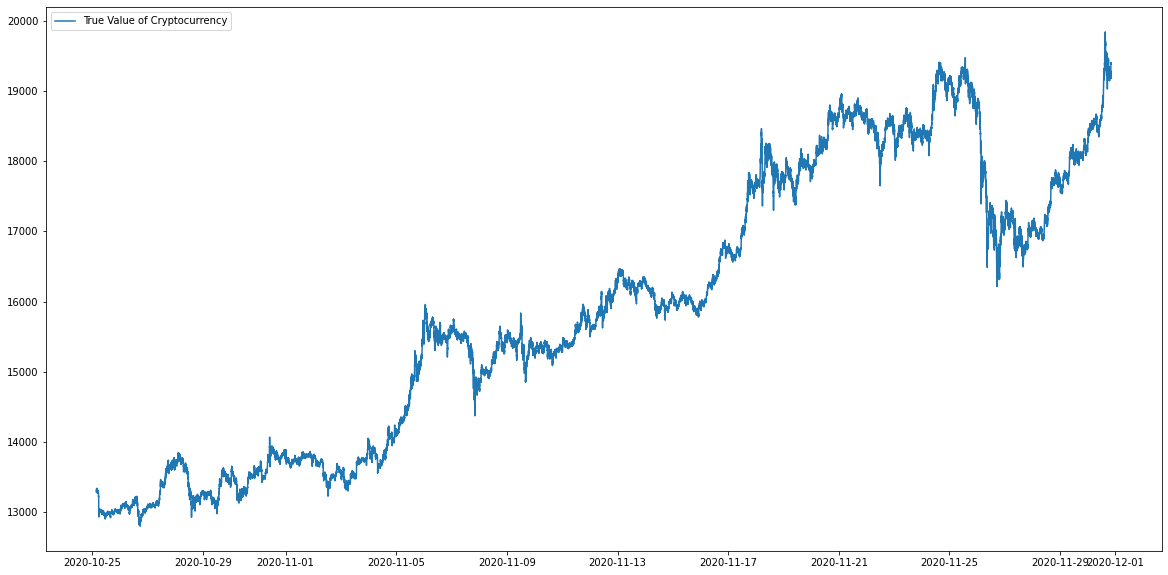

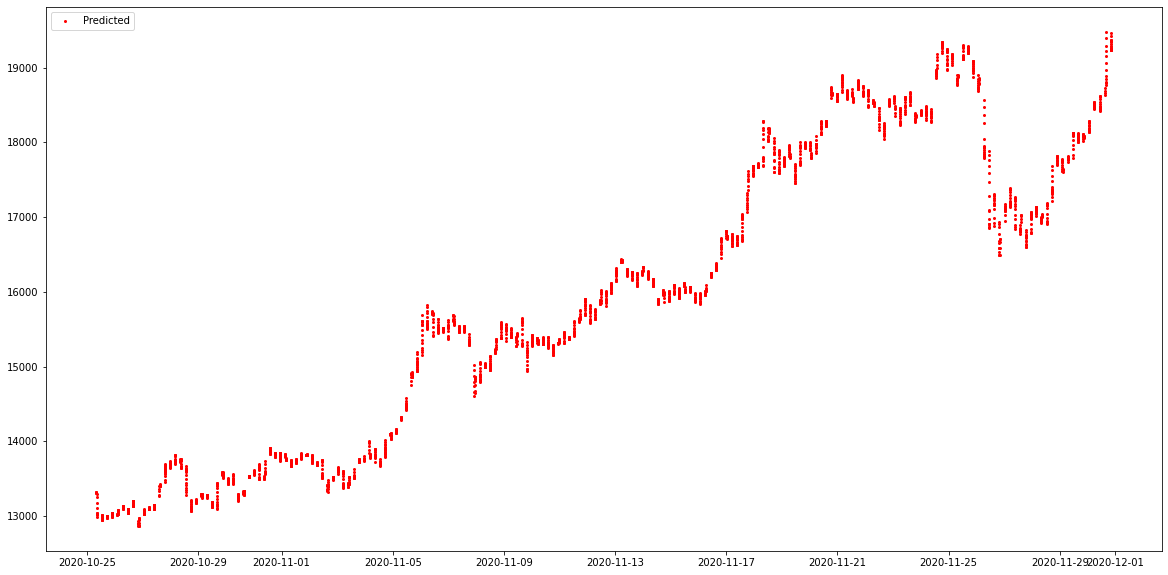

,times,value
3004,2020-11-29 15:58:00,18105.449219
3005,2020-11-29 15:59:00,18072.458984
3006,2020-11-29 16:00:00,18063.390625
3007,2020-11-29 16:01:00,18071.964844
3008,2020-11-29 20:18:00,18024.298828
...,...,...
3099,2020-11-30 20:09:00,19266.058594
3100,2020-11-30 20:10:00,19233.109375
3101,2020-11-30 20:11:00,19239.947266
3102,2020-11-30 20:12:00,19256.064453


In [142]:

plt.figure(figsize=(20,10))
plt.plot(real_chart_df.times, real_chart_df.value, label = 'True Value of Cryptocurrency')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(prediction_df.times, prediction_df.value, 'ro', label='Predicted', markersize=2)
plt.legend(loc='upper left')
plt.show()

prediction_df.tail(100)

In [143]:
real_chart_df

,times,value
0,2020-10-25 03:46:00,13290.89
1,2020-10-25 03:47:00,13312.01
2,2020-10-25 03:48:00,13323.16
3,2020-10-25 03:49:00,13330.99
4,2020-10-25 03:50:00,13323.68
...,...,...
52763,2020-11-30 20:09:00,19405.77
52764,2020-11-30 20:10:00,19399.50
52765,2020-11-30 20:11:00,19381.73
52766,2020-11-30 20:12:00,19366.44


In [144]:
# Get real_close_values
future_predict = pd.DataFrame(o_df['Close'])

# Scale minmax transform
for c in columns:
    future_predict[c] = scaler.fit_transform(future_predict[c].values.reshape(-1,1))

# Get last backwards 256
future_predict = np.array([future_predict[-512:-256]])
print('Backward input shape: ',future_predict[0].shape)

# Predict
predicted_future = model.predict(future_predict)

# Inverse Transform
predicted_future_inverted = []
for i in range(real_close_data.shape[1]):
    scaler.fit(real_close_data[:,i].reshape(-1,1))
    predicted_future_inverted.append(scaler.inverse_transform(predicted_future[:,:,i]))
    
predicted_future_inverted = np.array(predicted_future_inverted)
print(predicted_future_inverted)


Backward input shape:  (256, 1)
[[[19475.44  19458.234 19424.803 19353.54  19267.55  19241.898 19268.807
   19315.28  19369.467 19370.393 19342.994 19287.775 19266.059 19233.11
   19239.947 19256.064]]]


In [145]:
print((predicted_future_inverted[0])[0])
future_df = pd.DataFrame()
future_df['value'] =  (predicted_future_inverted[0])[0]

future_df


[19475.44  19458.234 19424.803 19353.54  19267.55  19241.898 19268.807
 19315.28  19369.467 19370.393 19342.994 19287.775 19266.059 19233.11
 19239.947 19256.064]


,value
0,19475.439453
1,19458.234375
2,19424.802734
3,19353.539062
4,19267.550781
5,19241.898438
6,19268.806641
7,19315.279297
8,19369.466797
9,19370.392578


In [146]:
from datetime import datetime
from datetime import timedelta


last_date_of_the_graph = np.array(pd.to_datetime(o_df['Timestamp'], unit='ns'))[-1]

dt_obj = datetime.strptime(str(last_date_of_the_graph)[:-4], "%Y-%m-%dT%H:%M:%S.%f")
dt_obj

dates = []


dt_obj += timedelta(seconds=60)
for i in range(16):
    dates.append(datetime.timestamp(dt_obj))
    dt_obj += timedelta(seconds=60)

    
    
timess = pd.DataFrame()
timess['times'] = dates
#dates = pd.DataFrame(np.array(dates).reshape(-1))
#future_df['times'] = pd.to_datetime(dates, unit='ns')
timess['times']



0     1.606770e+09
1     1.606770e+09
2     1.606770e+09
3     1.606770e+09
4     1.606770e+09
5     1.606770e+09
6     1.606770e+09
7     1.606770e+09
8     1.606771e+09
9     1.606771e+09
10    1.606771e+09
11    1.606771e+09
12    1.606771e+09
13    1.606771e+09
14    1.606771e+09
15    1.606771e+09
Name: times, dtype: float64

In [147]:
o_df_2048 = o_df[-512:-256]
o_df_2048

,Timestamp,Open,High,Low,Close,Volume
262740,2020-11-30 15:30:00,19674.99,19703.71,19615.00,19617.35,142.001691
262741,2020-11-30 15:31:00,19617.35,19643.98,19556.00,19563.49,485.529756
262742,2020-11-30 15:32:00,19565.06,19565.80,19325.00,19437.66,827.569916
262743,2020-11-30 15:33:00,19423.71,19440.00,19152.25,19307.08,985.377369
262744,2020-11-30 15:34:00,19314.27,19420.00,19280.00,19323.91,577.276214
...,...,...,...,...,...,...
262991,2020-11-30 19:41:00,19191.94,19191.95,19161.00,19184.33,102.620887
262992,2020-11-30 19:42:00,19184.34,19219.68,19183.70,19213.72,43.619863
262993,2020-11-30 19:43:00,19213.71,19259.80,19213.71,19249.14,75.117341
262994,2020-11-30 19:44:00,19249.15,19261.89,19231.16,19235.46,35.434445


16
0    2020-11-30 19:46:00
1    2020-11-30 19:47:00
2    2020-11-30 19:48:00
3    2020-11-30 19:49:00
4    2020-11-30 19:50:00
5    2020-11-30 19:51:00
6    2020-11-30 19:52:00
7    2020-11-30 19:53:00
8    2020-11-30 19:54:00
9    2020-11-30 19:55:00
10   2020-11-30 19:56:00
11   2020-11-30 19:57:00
12   2020-11-30 19:58:00
13   2020-11-30 19:59:00
14   2020-11-30 20:00:00
15   2020-11-30 20:01:00
Name: timestamps, dtype: datetime64[ns]
AAAA
AAAA


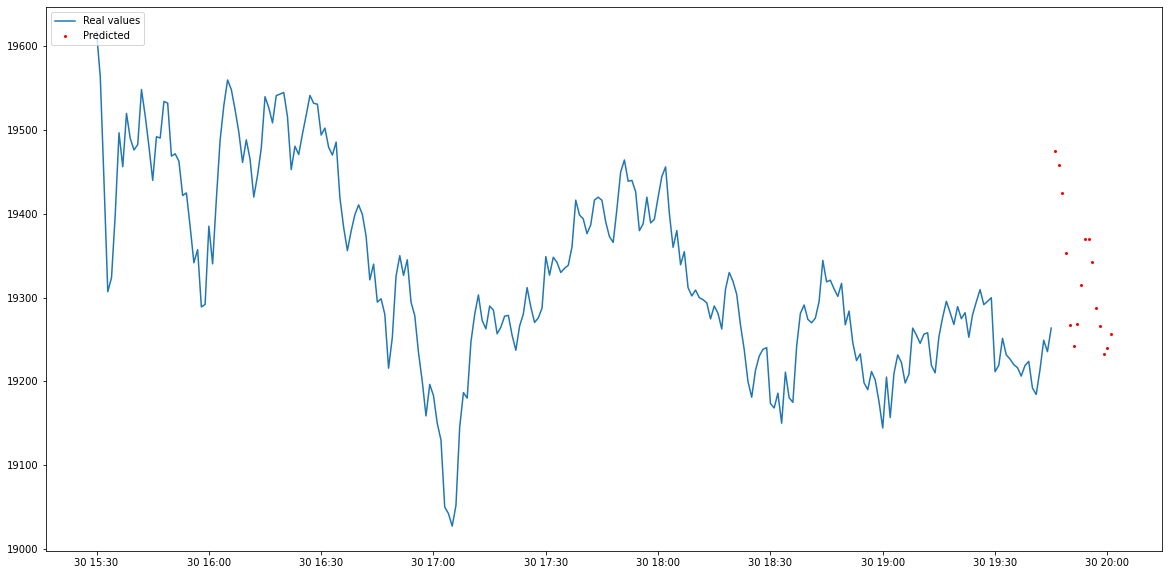

0    2020-11-30 19:46:00
1    2020-11-30 19:47:00
2    2020-11-30 19:48:00
3    2020-11-30 19:49:00
4    2020-11-30 19:50:00
5    2020-11-30 19:51:00
6    2020-11-30 19:52:00
7    2020-11-30 19:53:00
8    2020-11-30 19:54:00
9    2020-11-30 19:55:00
10   2020-11-30 19:56:00
11   2020-11-30 19:57:00
12   2020-11-30 19:58:00
13   2020-11-30 19:59:00
14   2020-11-30 20:00:00
15   2020-11-30 20:01:00
Name: timestamps, dtype: datetime64[ns]


In [148]:

real_8192 = pd.DataFrame()
real_8192['timestamps'] = pd.to_datetime(np.array(o_df_2048['Timestamp']).reshape(-1), unit='ns')
real_8192['close'] = np.array(o_df_2048['Close'])

o_df_512_256 = o_df[-256:-240]
print(len(o_df_512_256['Timestamp']))
time_512_256 = pd.DataFrame()
time_512_256['timestamps'] = pd.to_datetime(np.array(o_df_512_256['Timestamp']).reshape(-1), unit='ns')
print(time_512_256['timestamps'])
print("AAAA")

plt.figure(figsize=(20,10))
print("AAAA")
plt.plot(real_8192.timestamps, real_8192.close, label='Real values')

#plt.plot(real_chart_df.times, real_chart_df.value, label = 'Actual')
plt.plot(time_512_256.timestamps, future_df.value, 'ro', label='Predicted', markersize=2)
plt.legend(loc='upper left')
plt.show()

prediction_df['times'][0]
print(time_512_256['timestamps'])

In [128]:
o_df.tail(256)

,Timestamp,Open,High,Low,Close,Volume
65892,2021-01-16 04:20:00,36339.83,36481.48,36127.16,36133.30,268.652320
65893,2021-01-16 04:25:00,36133.30,36281.61,36133.30,36266.01,188.416157
65894,2021-01-16 04:30:00,36266.01,36394.34,36182.45,36388.86,201.719548
65895,2021-01-16 04:35:00,36388.86,36480.68,36334.11,36448.94,112.105698
65896,2021-01-16 04:40:00,36448.94,36454.76,36319.77,36329.46,178.612751
...,...,...,...,...,...,...
66143,2021-01-17 01:15:00,36340.88,36344.55,36206.09,36247.78,178.994015
66144,2021-01-17 01:20:00,36247.78,36357.14,36226.01,36338.98,184.207001
66145,2021-01-17 01:25:00,36338.64,36462.37,36210.80,36462.37,191.596306
66146,2021-01-17 01:30:00,36462.36,36500.00,36180.64,36256.91,323.896789
